# Régression logistique en 2D

Prédire la couleur d'un vin à partir de ses composants.

In [1]:
%matplotlib inline

In [4]:
from teachpyx.datasets import load_wines_dataset

data = load_wines_dataset()
X = data.drop(["quality", "color"], axis=1)
y = data["color"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from statsmodels.discrete.discrete_model import Logit

model = Logit(y_train == "white", X_train)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.048414
         Iterations 11


In [7]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Method:              MLE     
Dependent Variable:    color               Pseudo R-squared:    0.913   
Date:                  2024-01-23 00:52    AIC:                 493.7476
No. Observations:      4872                BIC:                 565.1515
Df Model:              10                  Log-Likelihood:      -235.87 
Df Residuals:          4861                LL-Null:             -2717.5 
Converged:             1.0000              LLR p-value:         0.0000  
No. Iterations:        11.0000             Scale:               1.0000  
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed_acidity         -1.4541   0.1515  -9.5981 0.0000  -1.7511  -1.1572
volatile_acidity     -11.3716   0.9995 -11.3771 0.0000 -13.3306  -9.4126
citric_acid            1.7492   1.1280   1.5507 0.1210  -0.4616   3.9599
residual_sugar         0.1246   0.0600   2.0756 0.0379   0.0069   0.2422
chlorides            -32.7390   3.9560  -8.2758 0.0000 -40.4926 -24.9854
free_sulfur_dioxide   -0.0505   0.0134  -3.7724 0.0002  -0.0768  -0.0243
total_sulfur_dioxide   0.0632   0.0050  12.6896 0.0000   0.0534   0.0730
density               42.0110   4.2093   9.9806 0.0000  33.7610  50.2610
pH                    -8.7417   0.9800  -8.9204 0.0000 -10.6624  -6.8210
sulphates             -8.8918   1.0237  -8.6857 0.0000 -10.8983  -6.8853
alcohol                0.4150   0.1233   3.3656 0.0008   0.1733   0.6567
========================================================================

"""

On ne garde que les deux premières.

In [8]:
X_train2 = X_train.iloc[:, :2]

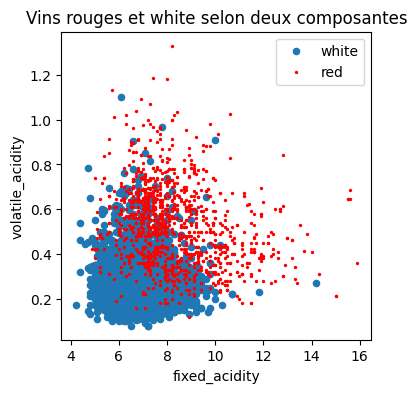

In [9]:
import pandas

df = pandas.DataFrame(X_train2.copy())
df["y"] = y_train

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(
    x="fixed_acidity", y="volatile_acidity", ax=ax, kind="scatter", label="white"
)
df[df.y == "red"].plot(
    x="fixed_acidity",
    y="volatile_acidity",
    ax=ax,
    kind="scatter",
    label="red",
    color="red",
    s=2,
)
ax.set_title("Vins rouges et white selon deux composantes");

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train2, y_train == "white")

LogisticRegression()

In [11]:
model.coef_, model.intercept_

(array([[ -1.11120776, -11.79383309]]), array([13.83313405]))

On trace cette droite sur le graphique.

In [12]:
x0 = 3
y0 = -(model.coef_[0, 0] * x0 + model.intercept_) / model.coef_[0, 1]
x1 = 14
y1 = -(model.coef_[0, 0] * x1 + model.intercept_) / model.coef_[0, 1]
x0, y0, x1, y1

(3, array([0.89025431]), 14, array([-0.14615898]))

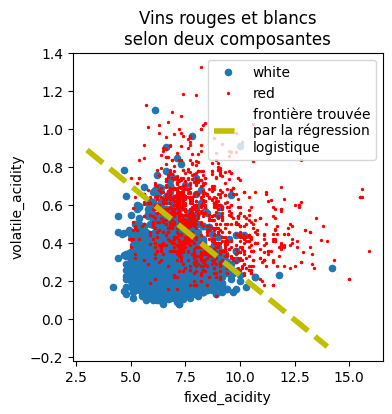

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(
    x="fixed_acidity", y="volatile_acidity", ax=ax, kind="scatter", label="white"
)
df[df.y == "red"].plot(
    x="fixed_acidity",
    y="volatile_acidity",
    ax=ax,
    kind="scatter",
    label="red",
    color="red",
    s=2,
)
ax.plot(
    [x0, x1],
    [y0, y1],
    "y--",
    lw=4,
    label="frontière trouvée\npar la régression\nlogistique",
)
ax.legend()
ax.set_title("Vins rouges et blancs\nselon deux composantes");